In [418]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

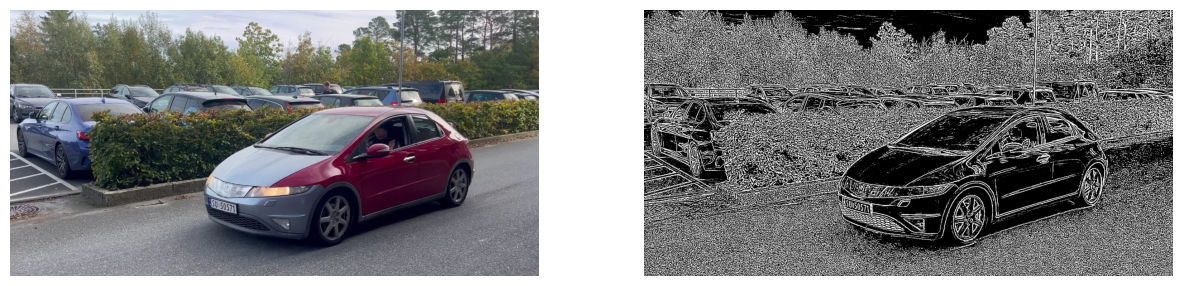

In [419]:
img = cv2.imread('bilder/larrybil.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY_INV, 11, 2)

plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.axis('off')
plt.show()

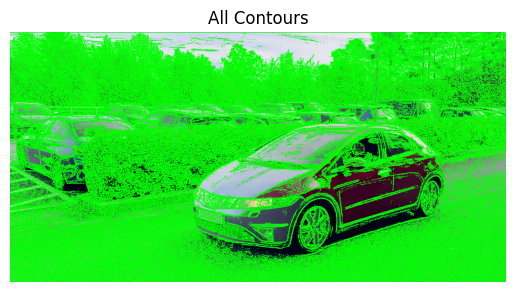

In [420]:
# Find contours in the dilated image
contours, _ = cv2.findContours(adaptive_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image to draw all contours
contour_image = img.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display the image with all contours
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('All Contours')
plt.axis('off')
plt.show()


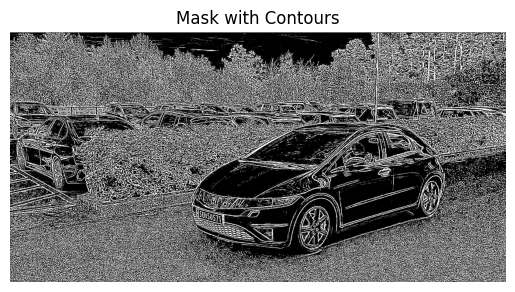

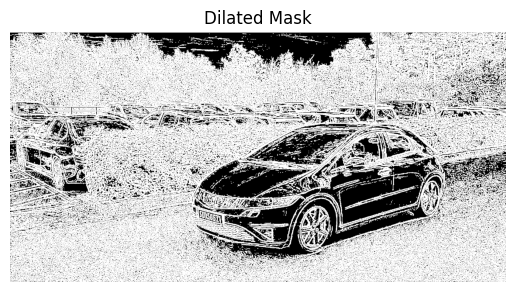

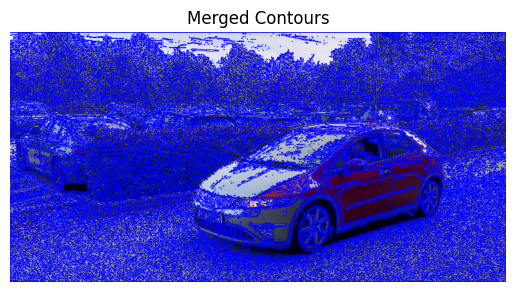

In [421]:
# Combine intersecting contours
# Create a blank mask with the same dimensions as the image
mask = np.zeros_like(gray)
cv2.drawContours(mask, contours, -1, 255, thickness=cv2.FILLED)

# Debug: Display the mask with drawn contours
plt.imshow(mask, cmap='gray')
plt.title('Mask with Contours')
plt.axis('off')
plt.show()

# Dilate the mask to merge intersecting contours
kernel = np.ones((3, 3), np.uint8)  # Increased kernel size
dilated_mask = cv2.dilate(mask, kernel, iterations=1)

# Debug: Display the dilated mask
plt.imshow(dilated_mask, cmap='gray')
plt.title('Dilated Mask')
plt.axis('off')
plt.show()

# Find new contours from the dilated mask
merged_contours, _ = cv2.findContours(dilated_mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Draw merged contours on the original image
merged_contour_image = img.copy()
cv2.drawContours(merged_contour_image, merged_contours, -1, (255, 0, 0), 2)

# Display the image with merged contours
plt.imshow(cv2.cvtColor(merged_contour_image, cv2.COLOR_BGR2RGB))
plt.title('Merged Contours')
plt.axis('off')
plt.show()